In [2]:
import pandas as pd

from itertools import combinations
from scipy import stats

from news_vec.utils import read_json_gz_lines

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [4]:
df = pd.DataFrame(read_json_gz_lines('../../data/clf-ab.json/'))

In [5]:
d1s, d2s = zip(*df[['d1', 'd2']].apply(lambda x: sorted(x), 1))

In [6]:
df['d1s'] = d1s
df['d2s'] = d2s

In [7]:
df['pair'] = df[['d1s', 'd2s']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [8]:
order = df.groupby('pair').mean().acc.sort_values(ascending=False).index

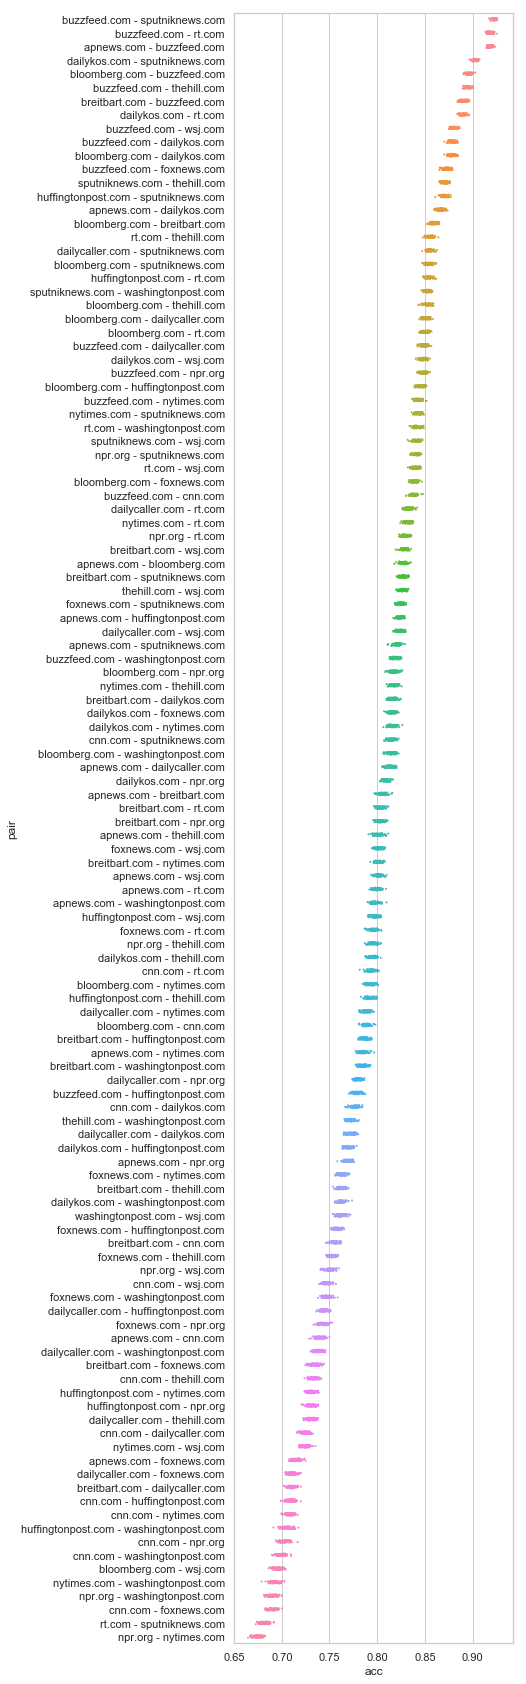

In [11]:
plt.figure(figsize=(5,30))
sns.stripplot(x='acc', y='pair', data=df, order=order, s=2)